In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('/content/wine.csv',header=None,usecols=[0,1,2], skiprows=[0])
df.columns=['Class label', 'Alcohol','Malic acid']
df['Alcohol'] = pd.to_numeric(df['Alcohol'])
df['Malic acid'] = pd.to_numeric(df['Malic acid'])

In [5]:
df

,Class label,Alcohol,Malic acid
0,Wine,Alcohol,Malic.acid
1,1,14.23,1.71
2,1,13.2,1.78
3,1,13.16,2.36
4,1,14.37,1.95
...,...,...,...
174,3,13.71,5.65
175,3,13.4,3.91
176,3,13.27,4.28
177,3,13.17,2.59


<Axes: xlabel='Alcohol', ylabel='Density'>

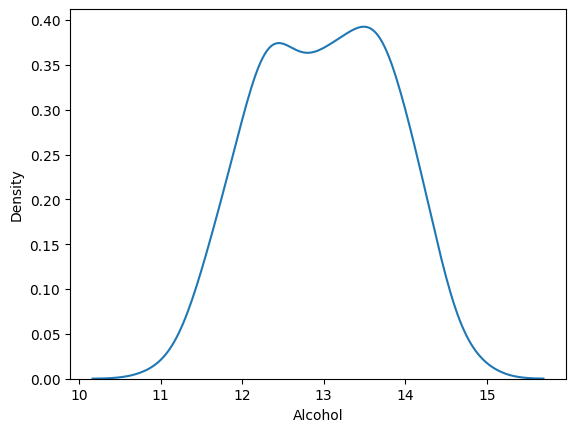

In [9]:
sns.kdeplot(x='Alcohol', data=df)

<Axes: xlabel='Malic acid', ylabel='Density'>

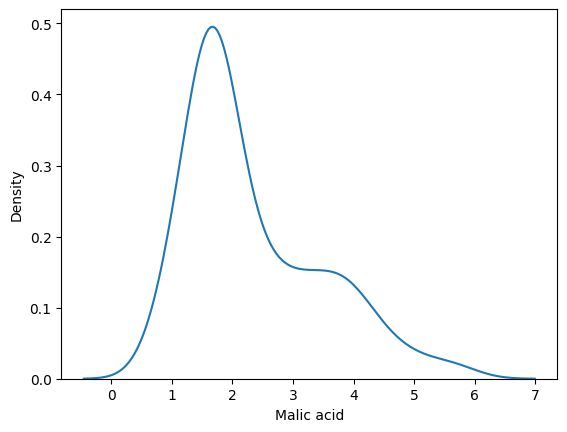

In [10]:
sns.kdeplot(x='Malic acid',data=df)

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

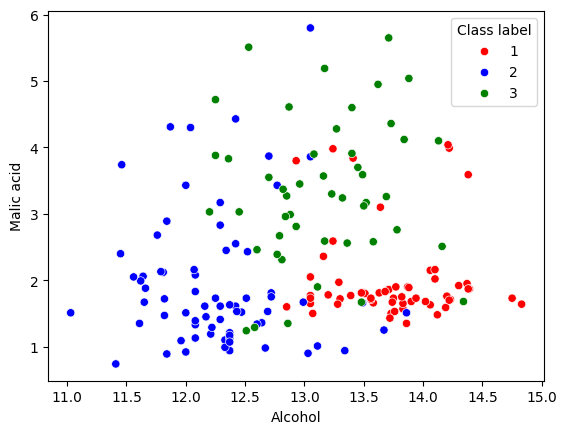

In [14]:
color_dist={1:'red',3:'green',2:'blue'}
sns.scatterplot(x=df['Alcohol'],y=df['Malic acid'],hue=df['Class label'],palette=color_dist)

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(df.drop('Class label',axis=1), df['Class label'], test_size=0.3,random_state=0)

X_train.shape, X_test.shape

((124, 2), (54, 2))

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [25]:
np.round(X_train.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [26]:
np.round(X_train_scaled.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


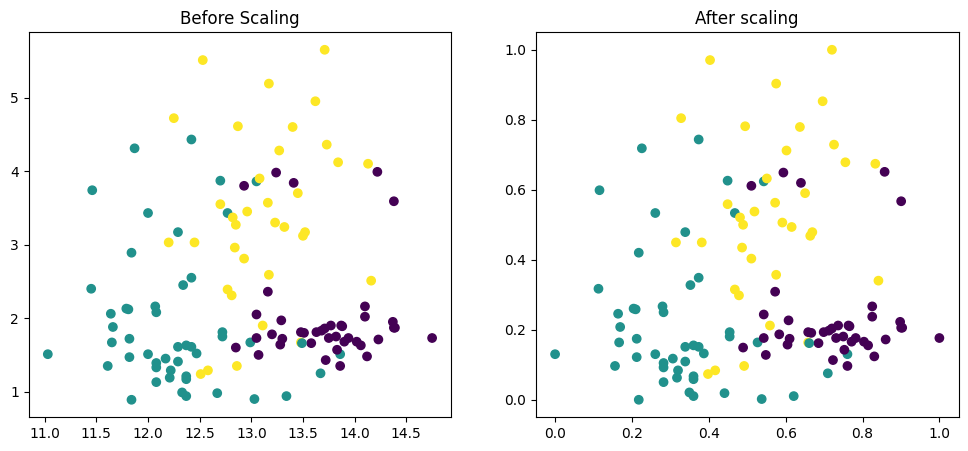

In [27]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))
ax1.scatter(X_train['Alcohol'],X_train['Malic acid'],c=y_train)
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Alcohol'],X_train_scaled['Malic acid'],c=y_train)
ax2.set_title("After scaling")
plt.show()

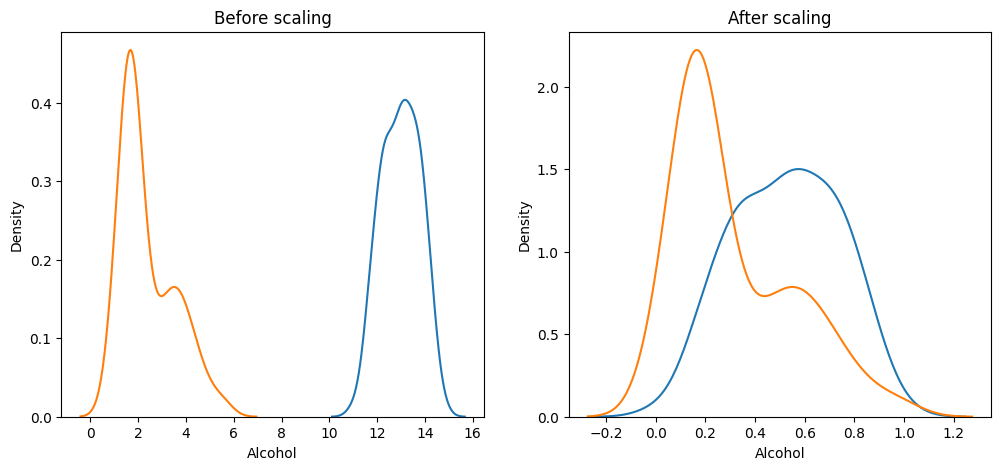

In [28]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

ax1.set_title("Before scaling")
sns.kdeplot(X_train['Alcohol'],ax=ax1)
sns.kdeplot(X_train['Malic acid'],ax=ax1)

ax2.set_title("After scaling")
sns.kdeplot(X_train_scaled['Alcohol'],ax=ax2)
sns.kdeplot(X_train_scaled['Malic acid'],ax=ax2)
plt.show()

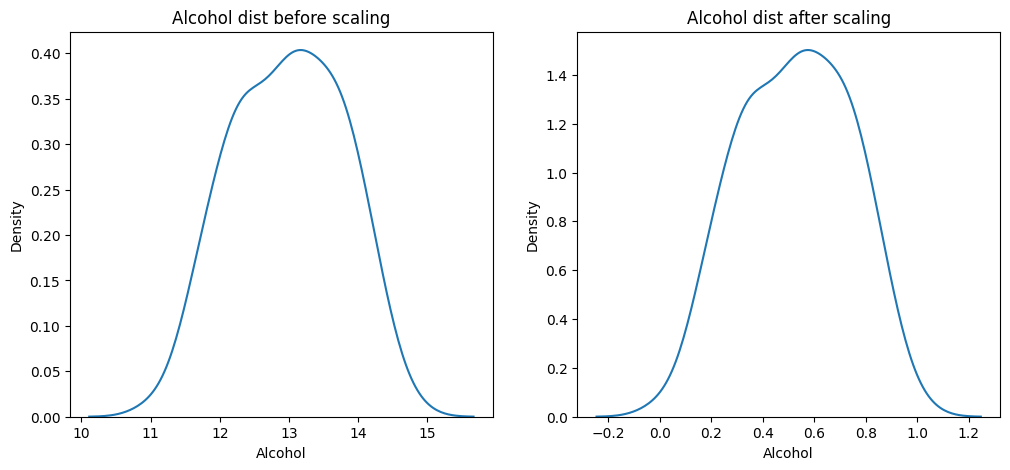

In [29]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

ax1.set_title('Alcohol dist before scaling')
sns.kdeplot(X_train['Alcohol'],ax=ax1)

ax2.set_title("Alcohol dist after scaling")
sns.kdeplot(X_train_scaled['Alcohol'],ax=ax2)
plt.show()

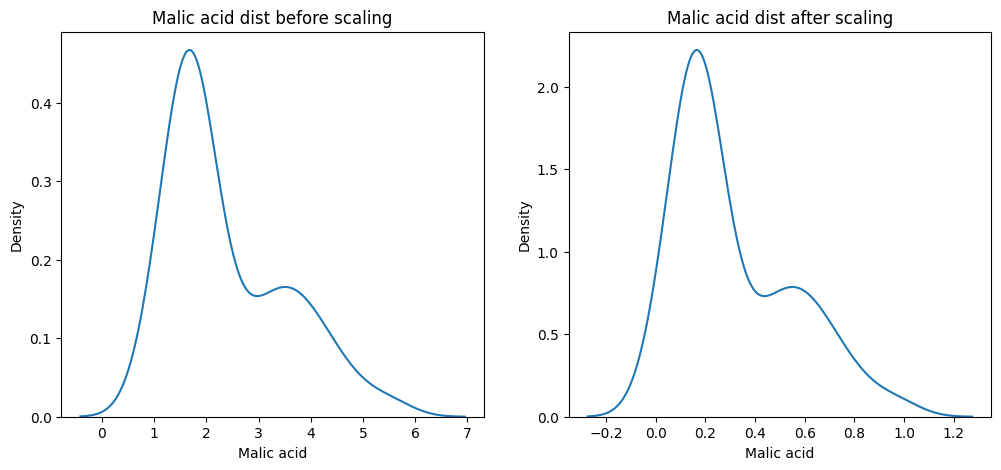

In [31]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

ax1.set_title("Malic acid dist before scaling")
sns.kdeplot(X_train['Malic acid'],ax=ax1)

ax2.set_title("Malic acid dist after scaling")
sns.kdeplot(X_train_scaled['Malic acid'],ax=ax)
plt.show()